# Final Project: Regression Analysis – Housing Price Prediction

**Author:** Adrianna Webb  
**Date:** November 25, 2025

## Introduction

This project demonstrates regression modeling techniques applied to housing price prediction. The dataset contains residential home sales data from Ames, Iowa, with 79 features describing various aspects of each property. The goal is to predict the sale price (SalePrice) based on features such as overall quality, square footage, year built, and other property characteristics.

Regression analysis helps identify which features most strongly influence home values, providing insights for real estate pricing decisions. This analysis will compare multiple regression approaches to determine which model best predicts housing prices.

In [269]:
# ------------------------------------------------
# Imports once at the top, organized
# ------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

In [270]:
# Don't shorten displays
pd.set_option("display.max_rows", None)

## Section 1. Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows

In [271]:
# Load housing dataset
df = pd.read_csv('data/train.csv')

# Display the first 10 rows
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### 1.2 Check for missing values and display summary statistics

In [272]:
# Check for missing values and data types
print("Missing values and column types:")
pd.DataFrame({
    "Data Type": df.dtypes,
    "Missing Values": df.isnull().sum()
})


Missing values and column types:


,Data Type,Missing Values
Id,int64,0
MSSubClass,int64,0
MSZoning,object,0
LotFrontage,float64,259
LotArea,int64,0
Street,object,0
Alley,object,1369
LotShape,object,0
LandContour,object,0
Utilities,object,0


In [273]:
# Display summary statistics
print("Summary statistics:")
df.describe()

Summary statistics:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Reflection 1:** What do you notice about the dataset? Are there any data issues?

The dataset contains 1460 observations with 81 columns total. Several columns have missing values, with LotFrontage having 259 missing values being one of the most notable. The target variable SalePrice has no missing values. 

SalePrice ranges from $34,900 to $755,000 with a mean of approximately $180,921. The distribution shows a wide range, suggesting I may need to handle outliers or consider transformations. Many features appear to be numeric (square footage, quality ratings, year built), while others are likely categorical based on the data description.

Key data issues to address:
- Missing values in several columns (LotFrontage, MasVnrArea, and likely others)
- Wide range in SalePrice suggests potential outliers
- Will need to decide which features to use and how to handle missing data in the preparation phase

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

In [274]:
# Display the shape and column names
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")

Dataset shape: (1460, 81)

Column names:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPo

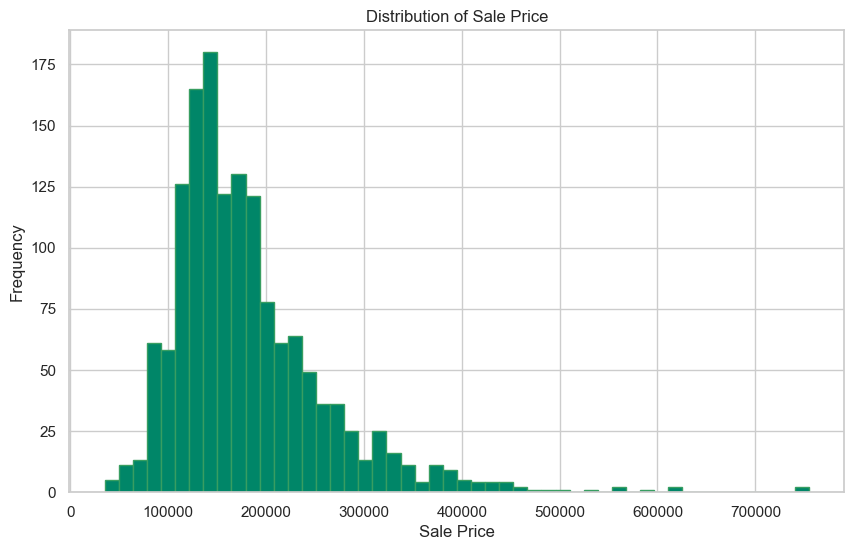

SalePrice statistics:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [275]:
# Check the distribution of the target variable
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=50, edgecolor='#389e61', color='#008668')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.show()

print(f"SalePrice statistics:")
print(df['SalePrice'].describe())

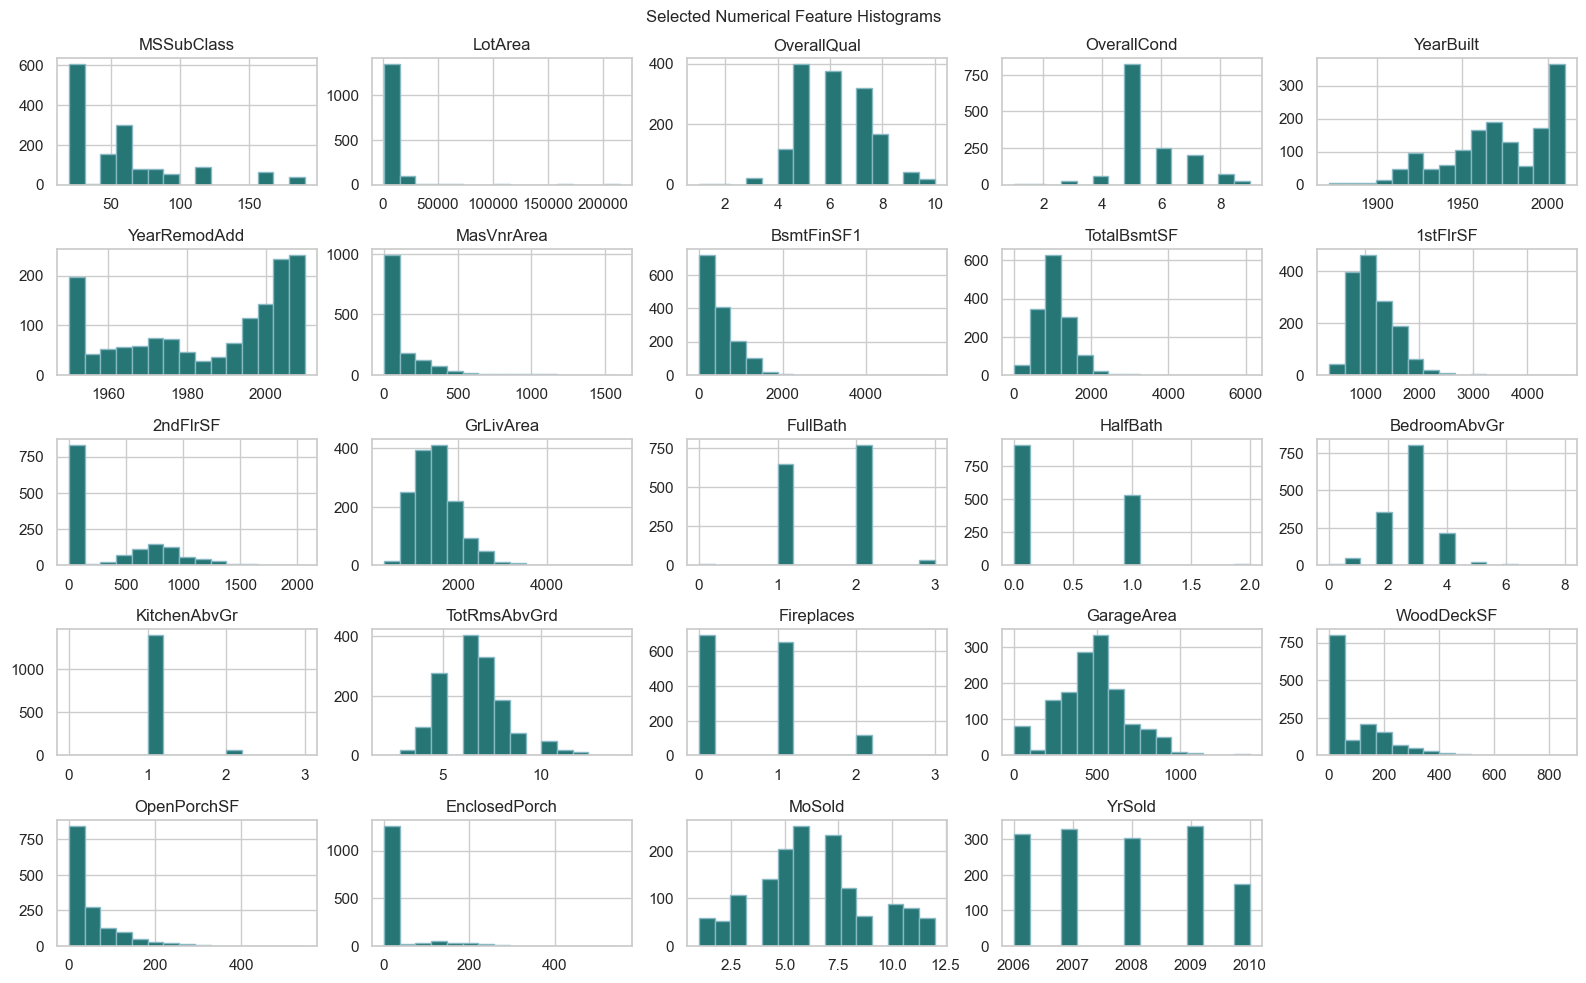

In [276]:
# Histograms for Numerical Features

# Plotting only the features I will consider using to predict house price 
cols_to_plot = ["MSSubClass", "LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageArea", "WoodDeckSF","OpenPorchSF", "EnclosedPorch", "MoSold", "YrSold"]

df[cols_to_plot].hist(figsize=(16, 10), bins=15, edgecolor="#89b8c5", color="#257675")
plt.suptitle("Selected Numerical Feature Histograms", fontsize=12)
plt.tight_layout(pad=1.0, w_pad=0.5, h_pad=1.0)
plt.show()


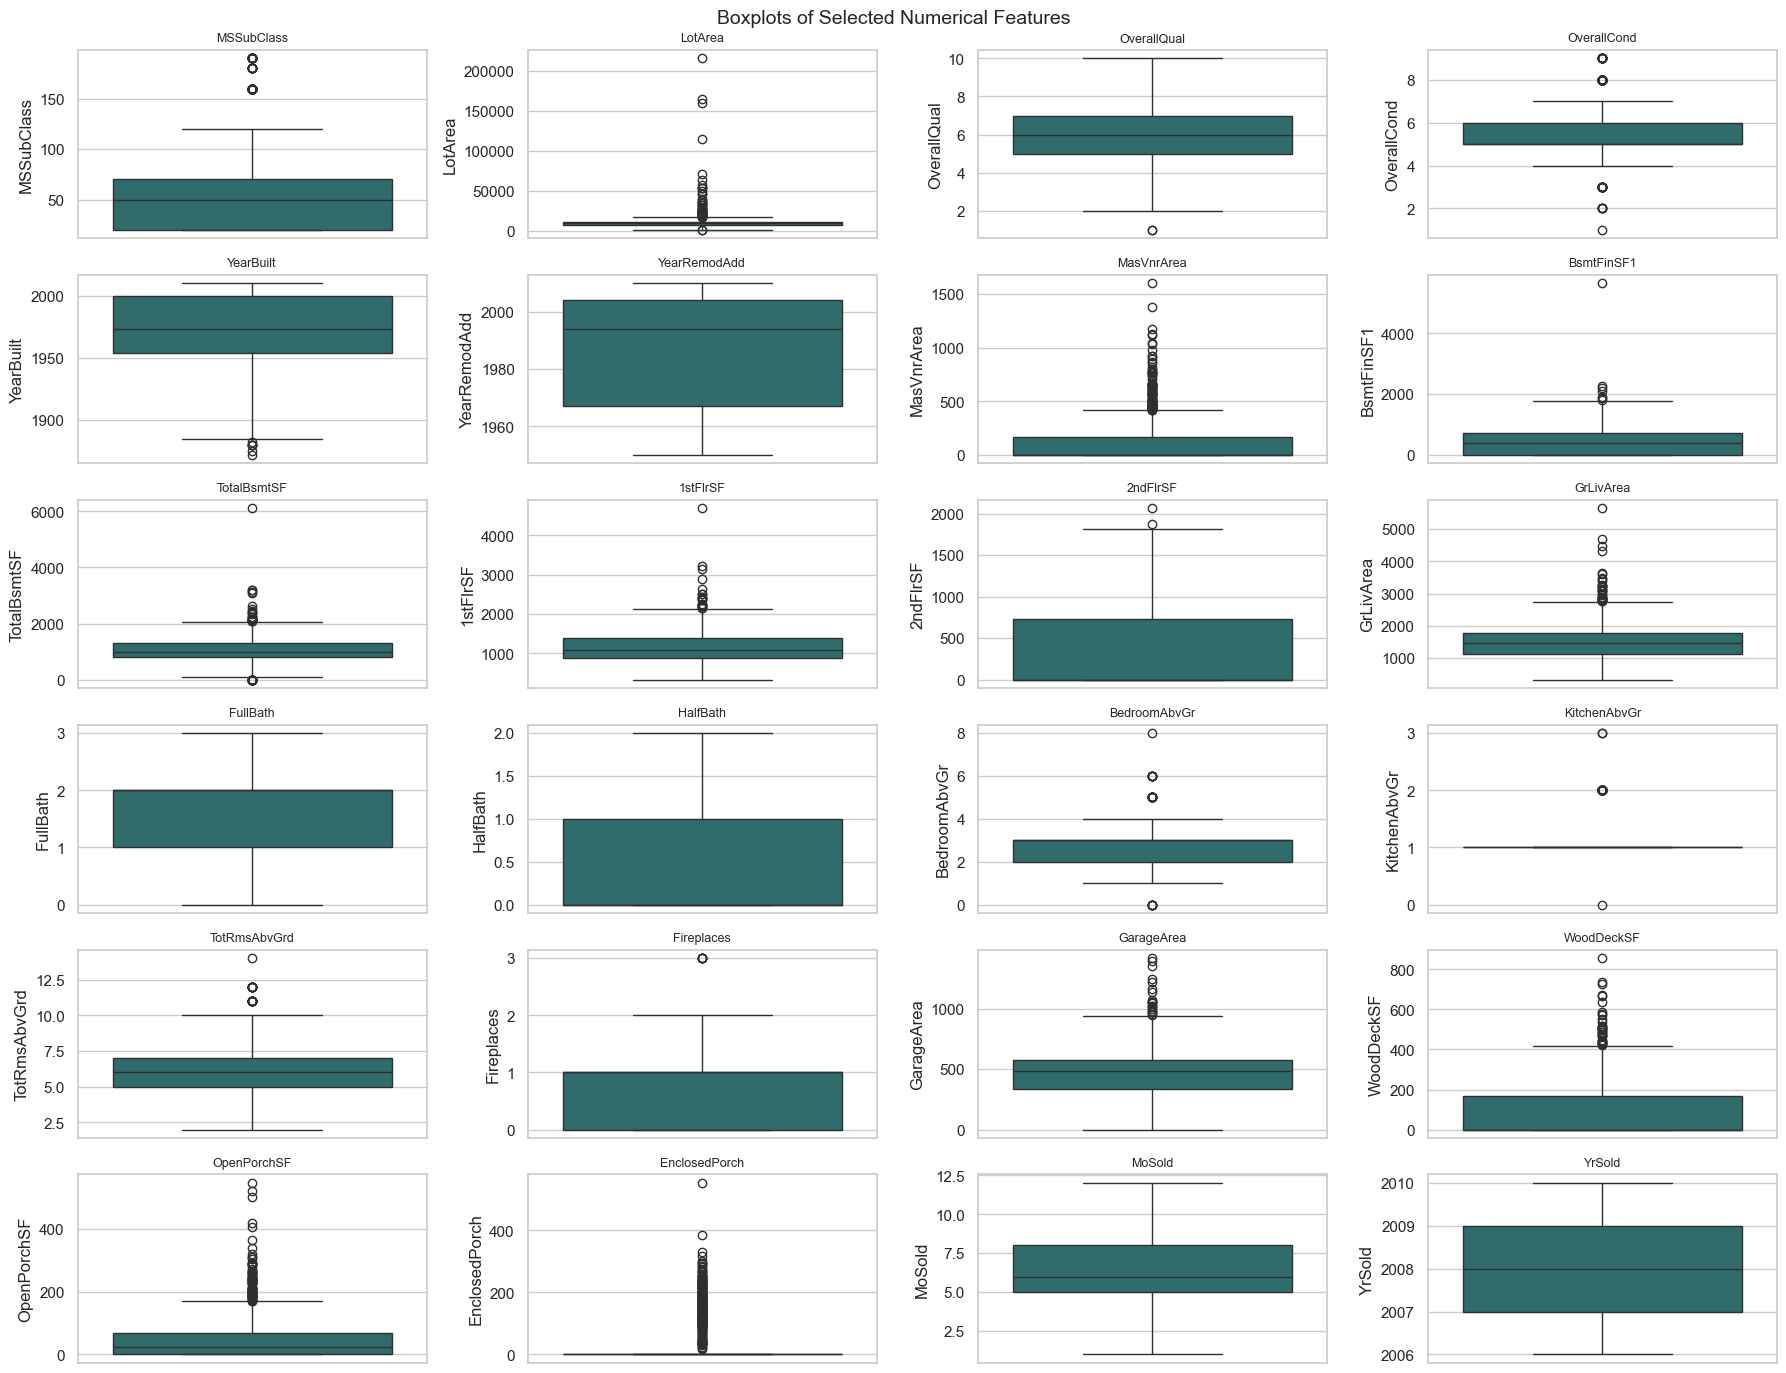

In [277]:
#Boxplots of numerical features
num_plots = len(cols_to_plot)
rows = 6
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(18, 14))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.boxplot( data=df, y=col, ax=axes[i],color="#257675")
    axes[i].set_title(col, fontsize=9)


plt.suptitle("Boxplots of Selected Numerical Features", fontsize=14)
plt.tight_layout(pad=1.0)
plt.show()


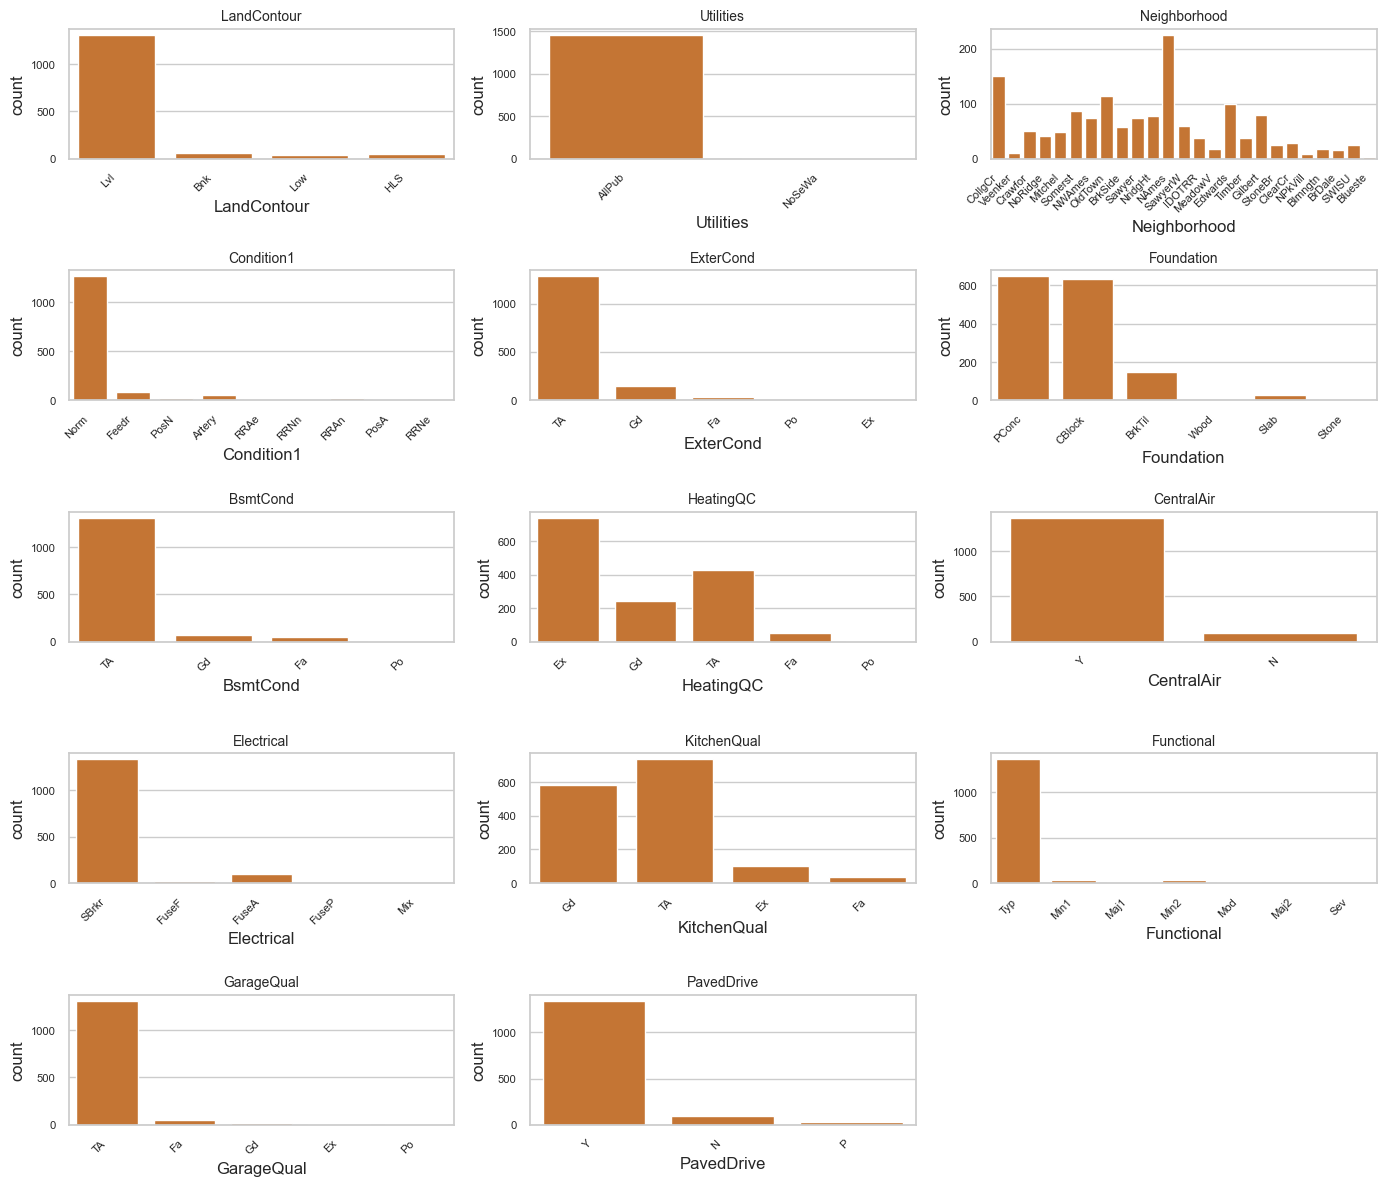

In [278]:
# Count Plots for Interesting Categorical Features

categorical_cols = ["LandContour", "Utilities", "Neighborhood", "Condition1", "ExterCond", "Foundation", "BsmtCond", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "GarageQual", "PavedDrive"]

plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=col, color="#dc731c")
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45, ha="right", fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout(pad=1.0)
plt.show()


### 2.2 Handle missing values and clean data

In [279]:
# Check which columns have missing values
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print("Columns with missing values:")
print(missing_data)
print(f"\nTotal columns with missing values: {len(missing_data)}")

Columns with missing values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

Total columns with missing values: 19


In [280]:
# Drop columns with excessive missing values (>50% missing)
columns_to_drop = ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
df = df.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop}")
print(f"Dataset shape after dropping columns: {df.shape}")

Dropped columns: ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
Dataset shape after dropping columns: (1460, 76)


In [281]:
# Handle numerical columns with missing data
# LotFrontage - legitimate missing data, impute with median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
print(f"Imputed LotFrontage with median: {df['LotFrontage'].median()}")

# MasVnrArea - missing means no masonry veneer, fill with 0
df['MasVnrArea'].fillna(0, inplace=True)
print("Filled MasVnrArea missing values with 0")

# GarageYrBlt - missing means no garage, fill with 0
df['GarageYrBlt'].fillna(0, inplace=True)
print("Filled GarageYrBlt missing values with 0")

Imputed LotFrontage with median: 69.0
Filled MasVnrArea missing values with 0
Filled GarageYrBlt missing values with 0


C:\Users\adria\AppData\Local\Temp\ipykernel_28564\1975352142.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
C:\Users\adria\AppData\Local\Temp\ipykernel_28564\1975352142.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [282]:
# Handle categorical columns - missing means feature doesn't exist
# Basement-related columns
basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in basement_cols:
    if col in df.columns:
        df[col].fillna('None', inplace=True)
        print(f"Filled {col} missing values with 'None'")

# Garage-related columns
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols:
    if col in df.columns:
        df[col].fillna('None', inplace=True)
        print(f"Filled {col} missing values with 'None'")

# Fireplace
if 'FireplaceQu' in df.columns:
    df['FireplaceQu'].fillna('None', inplace=True)
    print("Filled FireplaceQu missing values with 'None'")

# Electrical - legitimate missing data, impute with mode
if 'Electrical' in df.columns:
    mode_value = df['Electrical'].mode()[0]
    df['Electrical'].fillna(mode_value, inplace=True)
    print(f"Imputed Electrical with mode: {mode_value}")

Filled BsmtQual missing values with 'None'
Filled BsmtCond missing values with 'None'
Filled BsmtExposure missing values with 'None'
Filled BsmtFinType1 missing values with 'None'
Filled BsmtFinType2 missing values with 'None'
Filled GarageType missing values with 'None'
Filled GarageFinish missing values with 'None'
Filled GarageQual missing values with 'None'
Filled GarageCond missing values with 'None'
Filled FireplaceQu missing values with 'None'
Imputed Electrical with mode: SBrkr


C:\Users\adria\AppData\Local\Temp\ipykernel_28564\2671074506.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('None', inplace=True)
C:\Users\adria\AppData\Local\Temp\ipykernel_28564\2671074506.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [283]:
# Remove outliers - data errors and extreme cases
print(f"Dataset shape before outlier removal: {df.shape}")

# Remove properties with GrLivArea > 4000 
df = df[~((df['GrLivArea'] > 4000))]
print(f"Removed GrLivArea outliers")

# Remove properties in top 1% of LotArea (extremely large lots)
lot_area_threshold = df['LotArea'].quantile(0.99)
df = df[df['LotArea'] <= lot_area_threshold]
print(f"Removed LotArea outliers above {lot_area_threshold:.0f} sq ft")

# Remove extreme SalePrice outliers using IQR method
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]
print(f"Removed SalePrice outliers outside range [{lower_bound:.0f}, {upper_bound:.0f}]")

print(f"\nDataset shape after outlier removal: {df.shape}")

Dataset shape before outlier removal: (1460, 76)
Removed GrLivArea outliers
Removed LotArea outliers above 35415 sq ft
Removed SalePrice outliers outside range [5750, 335750]

Dataset shape after outlier removal: (1381, 76)


In [284]:
# Get list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding to each categorical column
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
    print(f"Encoded {col}")

Encoded MSZoning
Encoded Street
Encoded LotShape
Encoded LandContour
Encoded Utilities
Encoded LotConfig
Encoded LandSlope
Encoded Neighborhood
Encoded Condition1
Encoded Condition2
Encoded BldgType
Encoded HouseStyle
Encoded RoofStyle
Encoded RoofMatl
Encoded Exterior1st
Encoded Exterior2nd
Encoded ExterQual
Encoded ExterCond
Encoded Foundation
Encoded BsmtQual
Encoded BsmtCond
Encoded BsmtExposure
Encoded BsmtFinType1
Encoded BsmtFinType2
Encoded Heating
Encoded HeatingQC
Encoded CentralAir
Encoded Electrical
Encoded KitchenQual
Encoded Functional
Encoded FireplaceQu
Encoded GarageType
Encoded GarageFinish
Encoded GarageQual
Encoded GarageCond
Encoded PavedDrive
Encoded SaleType
Encoded SaleCondition


### 2.3 Feature selection and engineering

In [285]:
# Create new engineered features

# TotalSF - Total square footage of the house
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
print("Created TotalSF: TotalBsmtSF + 1stFlrSF + 2ndFlrSF")

# HouseAge - Age of the house at time of sale
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
print("Created HouseAge: YrSold - YearBuilt")

# TotalBath - Total number of bathrooms
df['TotalBath'] = df['FullBath'] + (0.5 * df['HalfBath'])
print("Created TotalBath: FullBath + (0.5 * HalfBath)")

# RemodAge - Age since last remodel at time of sale
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
print("Created RemodAge: YrSold - YearRemodAdd")

print(f"\nDataset shape after feature engineering: {df.shape}")



Created TotalSF: TotalBsmtSF + 1stFlrSF + 2ndFlrSF
Created HouseAge: YrSold - YearBuilt
Created TotalBath: FullBath + (0.5 * HalfBath)
Created RemodAge: YrSold - YearRemodAdd

Dataset shape after feature engineering: (1381, 80)


### Reflection 2:

**What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?**

The data exploration revealed several important patterns. The SalePrice distribution shows most homes selling between $130,000-$215,000 with some high-value properties extending to $400,000+. Many numerical features like square footage, quality ratings, and bathroom counts show right-skewed distributions, which is typical for housing data.

Several preprocessing steps were necessary to prepare the data:
- Dropped 5 columns with excessive missing values (over 50% missing) including Alley, PoolQC, and Fence
- Handled missing values appropriately: filled numerical features with 0 when absence indicated the feature didn't exist (like MasVnrArea for no masonry veneer), imputed LotFrontage with median for legitimate missing data, and filled categorical features with 'None' when the home simply didn't have that feature (basements, garages, fireplaces)
- Removed outliers including extremely large lots (top 1% of LotArea) and homes with living area over 4000 sq ft, along with extreme SalePrice values using the IQR method
- Encoded all categorical variables to numerical values using Label Encoding to make them usable in regression models

Four engineered features were created to capture meaningful relationships:
- TotalSF combines all square footage into one comprehensive size metric
- HouseAge captures how old the home is at time of sale
- RemodAge shows how recently the home was updated
- TotalBath provides a single bathroom count metric

These engineered features should help the model better understand property value drivers by combining related information into more meaningful predictors.

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

In [286]:
# Select features for prediction
features = ['TotalSF', 'HouseAge', 'TotalBath', 'OverallQual', 'BedroomAbvGr', 
            'LotArea', 'FullBath', 'Electrical', 'Neighborhood', 'HeatingQC', 'RemodAge']

# Define target variable
target = 'SalePrice'

print(f"Selected features ({len(features)}):")
for i, feature in enumerate(features, 1):
    print(f"  {i}. {feature}")

print(f"\nTarget variable: {target}")

Selected features (11):
  1. TotalSF
  2. HouseAge
  3. TotalBath
  4. OverallQual
  5. BedroomAbvGr
  6. LotArea
  7. FullBath
  8. Electrical
  9. Neighborhood
  10. HeatingQC
  11. RemodAge

Target variable: SalePrice


### 3.2 Define X and y

In [287]:
# Define X (input features) and y (target variable)
X = df[features]
y = df[target]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(X.columns.tolist())

X shape: (1381, 11)
y shape: (1381,)
['TotalSF', 'HouseAge', 'TotalBath', 'OverallQual', 'BedroomAbvGr', 'LotArea', 'FullBath', 'Electrical', 'Neighborhood', 'HeatingQC', 'RemodAge']


### Reflection 3:

**Why did you choose these features? How might they impact predictions or accuracy?**

These 11 features were selected based on their logical relationship to housing prices and their ability to capture different aspects of property value.

**Size and space features (TotalSF, LotArea, BedroomAbvGr, FullBath, TotalBath):** Property size is typically the strongest predictor of price. TotalSF provides a comprehensive measure of living space, while LotArea captures land value. Bedroom and bathroom counts are key selling points that buyers consider, making them important predictors.

**Quality and condition features (OverallQual, HeatingQC, Electrical):** OverallQual rates the overall material and finish quality, which directly impacts value. HeatingQC and Electrical reflect important systems that affect livability and maintenance costs. Higher quality ratings should correlate with higher prices.

**Age features (HouseAge, RemodAge):** Newer homes and recently remodeled properties typically command premium prices. These features help the model understand depreciation and the value of updates.

**Location feature (Neighborhood):** Location is critical in real estate pricing. Even though encoded as numerical values, neighborhood captures market demand variations across different areas of Ames, Iowa.

These features should provide strong predictive power because they represent the key factors buyers consider: location, size, quality, and condition. The combination of physical characteristics, quality ratings, and temporal factors should allow the model to accurately estimate sale prices across different property types and market segments.

## Section 4. Train a Model (Linear Regression)

### 4.1 Split the data into training and test sets

In [288]:
# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Training set size: 1104 samples
Test set size: 277 samples

X_train shape: (1104, 11)
X_test shape: (277, 11)
y_train shape: (1104,)
y_test shape: (277,)


### 4.2 Train model using Linear Regression

In [289]:
# Create and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print(f"Model coefficients:")
for feature, coef in zip(features, lr_model.coef_):
    print(f"  {feature}: {coef:.2f}")
print(f"\nIntercept: {lr_model.intercept_:.2f}")

Model coefficients:
  TotalSF: 38.61
  HouseAge: -271.16
  TotalBath: 10870.63
  OverallQual: 15582.78
  BedroomAbvGr: -4502.25
  LotArea: 2.04
  FullBath: -9332.70
  Electrical: 677.48
  Neighborhood: 151.06
  HeatingQC: -1668.26
  RemodAge: -257.29

Intercept: -15152.10


In [290]:
# Make predictions on both training and test sets
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

print("Predictions generated for training and test sets")

Predictions generated for training and test sets


### 4.3 Evaluate performance

In [291]:
# Calculate performance metrics for training set
train_r2 = r2_score(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = root_mean_squared_error(y_train, y_pred_train)

print("Training Set Performance:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  MAE: ${train_mae:.2f}")
print(f"  MSE: ${train_mse:.2f}")
print(f"  RMSE: ${train_rmse:.2f}")

Training Set Performance:
  R² Score: 0.8442
  MAE: $17658.57
  MSE: $549344965.63
  RMSE: $23438.11


In [292]:
# Calculate performance metrics for test set
test_r2 = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = root_mean_squared_error(y_test, y_pred_test)

print("Test Set Performance:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  MAE: ${test_mae:.2f}")
print(f"  MSE: ${test_mse:.2f}")
print(f"  RMSE: ${test_rmse:.2f}")

Test Set Performance:
  R² Score: 0.7874
  MAE: $17335.53
  MSE: $580458129.44
  RMSE: $24092.70


### Reflection 4:

**How well did the model perform? Any surprises in the results?**

The Linear Regression model performed reasonably well with an R² score of 0.8442 on training data and 0.7874 on test data. This means the model explains approximately 79% of the variance in house prices on unseen data, which is a solid baseline performance.

The RMSE of $24,092.70 on the test set indicates that predictions are typically off by about $24,000. Given that the average home price is around $180,000, this represents roughly 13% error, which is acceptable for an initial model but leaves room for improvement.

Some interesting coefficient findings:
- OverallQual has the strongest positive impact ($15,582 per quality point), confirming that quality is a major price driver
- TotalBath also shows strong positive influence ($10,870 per bathroom)
- Surprisingly, BedroomAbvGr has a negative coefficient (-$4,502), suggesting that more bedrooms actually decrease value when controlling for total square footage - likely because it means smaller individual rooms
- FullBath also shows negative impact when TotalBath is included, indicating some multicollinearity between these features

The gap between training (R²=0.844) and test (R²=0.787) performance suggests slight overfitting, though the difference is not severe. The model generalizes fairly well to new data. 

## Section 5. Improve the Model or Try Alternates (Implement Pipelines)

### 5.1 Implement Pipeline 1: Imputer → StandardScaler → Ridge Regression

In [293]:
# Create Pipeline 1: Imputer → StandardScaler → Ridge Regression
pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=1.0))
])

# Train the pipeline
pipeline1.fit(X_train, y_train)

# Make predictions
y_pred_train_p1 = pipeline1.predict(X_train)
y_pred_test_p1 = pipeline1.predict(X_test)

In [294]:
# Evaluate Pipeline 1 performance
print("Pipeline 1: Imputer → StandardScaler → Ridge Regression")
print("\nTraining Set Performance:")
print(f"  R² Score: {r2_score(y_train, y_pred_train_p1):.4f}")
print(f"  MAE: ${mean_absolute_error(y_train, y_pred_train_p1):.2f}")
print(f"  RMSE: ${root_mean_squared_error(y_train, y_pred_train_p1):.2f}")

print("\nTest Set Performance:")
print(f"  R² Score: {r2_score(y_test, y_pred_test_p1):.4f}")
print(f"  MAE: ${mean_absolute_error(y_test, y_pred_test_p1):.2f}")
print(f"  RMSE: ${root_mean_squared_error(y_test, y_pred_test_p1):.2f}")

Pipeline 1: Imputer → StandardScaler → Ridge Regression

Training Set Performance:
  R² Score: 0.8442
  MAE: $17656.37
  RMSE: $23438.15

Test Set Performance:
  R² Score: 0.7874
  MAE: $17331.92
  RMSE: $24090.13


### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression

In [295]:
# Create Pipeline 2: Imputer → Polynomial Features → StandardScaler → Linear Regression
pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train the pipeline
pipeline2.fit(X_train, y_train)

# Make predictions
y_pred_train_p2 = pipeline2.predict(X_train)
y_pred_test_p2 = pipeline2.predict(X_test)

In [296]:
# Evaluate Pipeline 2 performance
print("Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression")
print("\nTraining Set Performance:")
print(f"  R² Score: {r2_score(y_train, y_pred_train_p2):.4f}")
print(f"  MAE: ${mean_absolute_error(y_train, y_pred_train_p2):.2f}")
print(f"  RMSE: ${root_mean_squared_error(y_train, y_pred_train_p2):.2f}")

print("\nTest Set Performance:")
print(f"  R² Score: {r2_score(y_test, y_pred_test_p2):.4f}")
print(f"  MAE: ${mean_absolute_error(y_test, y_pred_test_p2):.2f}")
print(f"  RMSE: ${root_mean_squared_error(y_test, y_pred_test_p2):.2f}")

Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression

Training Set Performance:
  R² Score: 0.9225
  MAE: $12334.55
  RMSE: $16532.89

Test Set Performance:
  R² Score: 0.3372
  MAE: $22739.70
  RMSE: $42536.21


### 5.3 Compare performance of all models

In [ ]:
# Create comparison table
results = {
    'Model': ['Linear Regression (Baseline)', 'Pipeline 1 (Imputer + Scaler + Ridge)', 'Pipeline 2 (Imputer + Poly3 + Scaler + LR)'],
    'Train R²': [train_r2, r2_score(y_train, y_pred_train_p1), r2_score(y_train, y_pred_train_p2)],
    'Test R²': [test_r2, r2_score(y_test, y_pred_test_p1), r2_score(y_test, y_pred_test_p2)],
    'Train RMSE': [train_rmse, root_mean_squared_error(y_train, y_pred_train_p1), root_mean_squared_error(y_train, y_pred_train_p2)],
    'Test RMSE': [test_rmse, root_mean_squared_error(y_test, y_pred_test_p1), root_mean_squared_error(y_test, y_pred_test_p2)],
    'Train MAE': [train_mae, mean_absolute_error(y_train, y_pred_train_p1), mean_absolute_error(y_train, y_pred_train_p2)],
    'Test MAE': [test_mae, mean_absolute_error(y_test, y_pred_test_p1), mean_absolute_error(y_test, y_pred_test_p2)]
}

results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df.to_string(index=False))

Model Performance Comparison:
                                     Model  Train R²  Test R²   Train RMSE    Test RMSE    Train MAE     Test MAE
              Linear Regression (Baseline)  0.844157 0.787377 23438.109259 24092.698675 17658.573936 17335.534150
        Pipeline 1 (Imputer + Scaler + LR)  0.844156 0.787422 23438.147095 24090.125935 17656.370634 17331.918863
Pipeline 2 (Imputer + Poly3 + Scaler + LR)  0.922457 0.337238 16532.886412 42536.214807 12334.548987 22739.698155


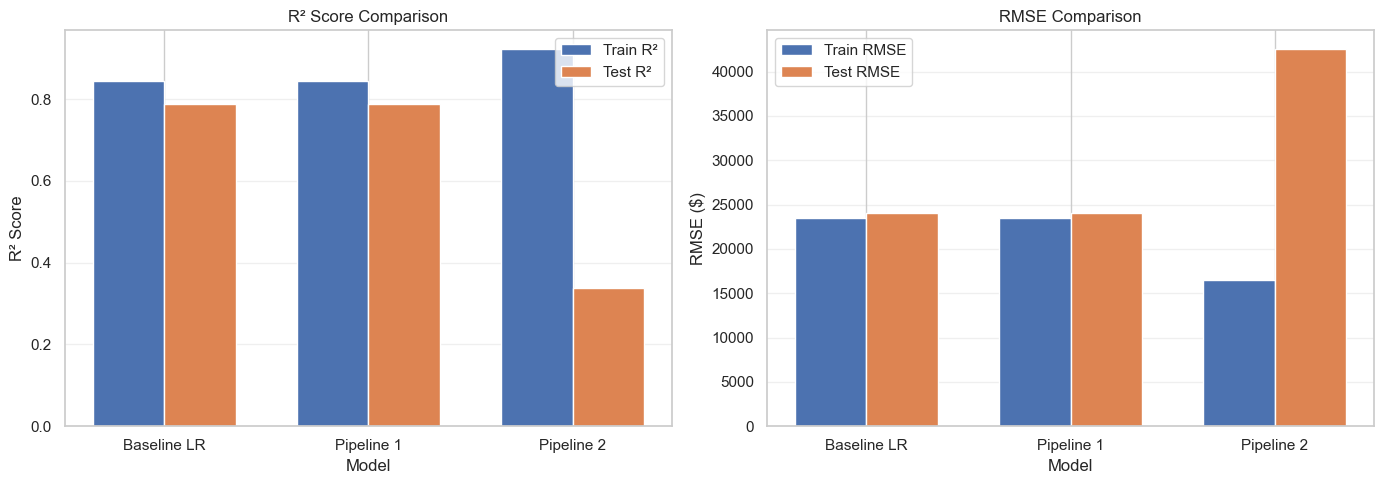

In [300]:
# Visualize R² scores comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Score comparison
models = ['Baseline LR', 'Pipeline 1', 'Pipeline 2']
train_r2_scores = [train_r2, r2_score(y_train, y_pred_train_p1), r2_score(y_train, y_pred_train_p2)]
test_r2_scores = [test_r2, r2_score(y_test, y_pred_test_p1), r2_score(y_test, y_pred_test_p2)]

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, train_r2_scores, width, label='Train R²',)
axes[0].bar(x + width/2, test_r2_scores, width, label='Test R²')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Score Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# RMSE comparison
train_rmse_scores = [train_rmse, root_mean_squared_error(y_train, y_pred_train_p1), root_mean_squared_error(y_train, y_pred_train_p2)]
test_rmse_scores = [test_rmse, root_mean_squared_error(y_test, y_pred_test_p1), root_mean_squared_error(y_test, y_pred_test_p2)]

axes[1].bar(x - width/2, train_rmse_scores, width, label='Train RMSE')
axes[1].bar(x + width/2, test_rmse_scores, width, label='Test RMSE')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('RMSE ($)')
axes[1].set_title('RMSE Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Reflection 5: 

**Which models performed better? How does scaling impact results?**

The comparison reveals interesting patterns across the three models:

**Pipeline 1 (Ridge Regression with scaling)** performed nearly identically to the baseline Linear Regression, with a test R² of 0.787 and RMSE of $24,090. The Ridge regularization with alpha=1.0 had minimal impact, likely because the baseline model wasn't severely overfitting. The small performance difference suggests that our feature set doesn't suffer from significant multicollinearity issues that Ridge regularization typically addresses. Scaling is essential for Ridge to work properly since it penalizes coefficient magnitudes, but in this case, the regularization effect was negligible.

**Pipeline 2 (Polynomial Features degree=3)** shows a dramatic case of overfitting. While the training performance improved significantly (R² = 0.922, RMSE = $16,533), the test performance collapsed (R² = 0.337, RMSE = $42,536). This means the model learned the training data extremely well but failed to generalize to new data. The polynomial features created complex interactions between our 11 features, generating hundreds of new polynomial terms that allowed the model to memorize training patterns rather than learn meaningful relationships. The test RMSE of $42,536 is almost double the baseline, making this model worse than simply predicting the average price.

**Best performing model:** The baseline Linear Regression and Pipeline 1 (Ridge) are essentially tied as the best models, both explaining about 79% of price variance with RMSE around $24,000. For deployment, either model would be suitable, though Ridge might be slightly preferred for its regularization properties if the model were to be retrained with additional features in the future.

**Key lesson:** More complexity doesn't always mean better performance. The simpler linear model outperformed the complex polynomial model by maintaining better generalization to unseen data.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize findings

This analysis successfully developed a regression model to predict housing prices in Ames, Iowa. The baseline Linear Regression model and Ridge Regression (Pipeline 1) both achieved approximately 79% accuracy (R² = 0.787) on test data with an average prediction error of about $24,000 (RMSE).

**Key findings:**
- The 11 selected features (TotalSF, HouseAge, TotalBath, OverallQual, BedroomAbvGr, LotArea, FullBath, Electrical, Neighborhood, HeatingQC, RemodAge) effectively predict housing prices
- OverallQual and TotalBath were the strongest positive predictors, confirming that quality and bathroom count significantly drive home values
- Feature engineering improved model interpretability by creating meaningful composite features like TotalSF and HouseAge
- Simple models outperformed complex polynomial models due to better generalization
- Ridge regularization provided no meaningful improvement over basic Linear Regression, suggesting the model isn't suffering from multicollinearity or overfitting with the current feature set

### 6.2 Discuss challenges faced

Several challenges emerged during this analysis:

**Missing data handling:** The most significant challenge was determining whether missing values represented true missing data or indicated the absence of a feature (like no garage or no basement). This required careful review of the data description to properly impute values with 0 or "None" rather than median/mode.

**Feature selection:** With 79+ original features, choosing the right subset required balancing predictive power with model simplicity. Some features showed unexpected relationships (like BedroomAbvGr having a negative coefficient), showing the complexity of multivariate relationships.

**Outlier detection:** Deciding which outliers to remove was challenging. Extremely large lot sizes and unusual property configurations needed to be filtered without removing legitimate high-value homes.

**Model complexity vs. generalization:** The polynomial regression results demonstrated that adding complexity can severely hurt performance. The dramatic overfitting (test R² dropping to 0.337) showed that more features and interactions don't automatically improve predictions.

**Encoding categorical variables:** Converting neighborhood, heating quality, and other categorical features to numerical values using label encoding may have lost some information that one-hot encoding could have preserved, though it kept the model simpler.

### 6.3 If you had more time, what would you try next?

With additional time, several improvements could be explored:

**Feature engineering:**
- Create interaction terms between key features (e.g., OverallQual × TotalSF)
- Engineer location-based features combining Neighborhood with property characteristics
- Create age-quality interaction terms to capture how quality degrades over time

**Alternative models:**
- Try ElasticNet to combine L1 and L2 regularization
- Experiment with different polynomial degrees (degree=2 instead of 3) for less aggressive complexity
- Test tree-based models like Random Forest or Gradient Boosting which handle non-linear relationships differently

**Feature selection refinement:**
- Use correlation analysis to remove redundant features (like FullBath when TotalBath exists)
- Try forward/backward stepwise selection to identify the optimal feature subset
- Investigate one-hot encoding for categorical variables instead of label encoding


**Reflection 6:** What did you learn from this project?

This project reinforced several important machine learning principles. First, data preprocessing is critical. Properly handling missing values, outliers, and feature engineering laid the foundation for model success. Second, simpler models can outperform complex ones, as demonstrated by the polynomial regression's failure to generalize. Third, understanding domain context matters - knowing that "missing" basement data meant "no basement" rather than unknown data was crucial for proper preprocessing.

I learned that model evaluation requires looking beyond training performance to test performance to identify overfitting. The dramatic difference between polynomial regression's training (R²=0.92) and test (R²=0.34) scores illustrated this perfectly. I also gained experience with scikit-learn pipelines, which provide a clean way to chain preprocessing and modeling steps together.

Finally, this project demonstrated that feature selection and engineering can be just as important as model choice. The engineered features (TotalSF, HouseAge, TotalBath, RemodAge) provided meaningful predictive value by capturing relationships the raw features couldn't express individually. Overall, this analysis showed that successful regression modeling requires balancing data quality, feature engineering, model complexity, and generalization ability.